In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sn
from datetime import datetime
from numpy import mean, std
from math import sqrt
from scipy.stats import skew
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
# Import dataset
train = pd.read_csv("/content/drive/MyDrive/Ignacio Fiori Training/Machine Learning/Bike Sharing Demand/train.csv")

In [ ]:
train, test=train_test_split(train, test_size=.2)

In [ ]:
print(train.shape)
print(test.shape)

(8708, 12)
(2178, 12)




*   datetime - hourly date + timestamp 
*   season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
*   holiday - whether the day is considered a holiday
*   workingday - whether the day is neither a weekend nor holiday
*   weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
*   temp - temperature in Celsius
*   atemp - "feels like" temperature in Celsius
*   humidity - relative humidity
*   windspeed - wind speed
*   casual - number of non-registered user rentals initiated
*   registered - number of registered user rentals initiated
*   count - number of total rentals





**Exploration and Preprocessing of Data**

As a first step we can take a look in the data

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8771,2012-08-07 20:00:00,3,0,1,2,30.34,34.850,70,8.9981,74,374,448
4723,2011-11-09 21:00:00,4,0,1,1,16.40,20.455,87,0.0000,9,152,161
6348,2012-03-01 18:00:00,1,0,1,1,22.14,25.760,34,23.9994,27,498,525
3566,2011-08-18 12:00:00,3,0,1,1,32.80,37.120,52,19.0012,34,139,173
2458,2011-06-10 08:00:00,2,0,1,1,30.34,34.090,58,8.9981,29,423,452


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5329,2011-12-16 03:00:00,4,0,1,1,18.86,22.725,82,8.9981,2,3,5
733,2011-02-13 22:00:00,1,0,0,1,16.40,20.455,35,19.9995,5,31,36
10625,2012-12-09 03:00:00,4,0,0,2,16.40,20.455,87,7.0015,14,34,48
9275,2012-09-09 20:00:00,3,0,0,1,25.42,31.060,41,19.0012,91,265,356
8418,2012-07-12 03:00:00,3,0,1,1,26.24,30.305,69,7.0015,0,10,10


In [ ]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Text(0.5, 1.0, 'Checking our target variable')

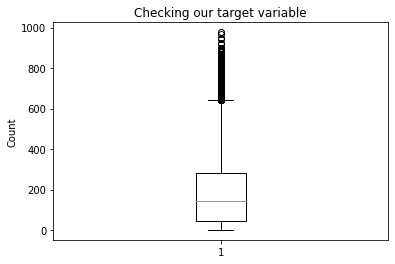

In [ ]:
plt.boxplot(train['count'])
plt.ylabel("Count")
plt.title("Checking our target variable")

We'll see some categorical variables

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Box Plot On Count Across Weather')]

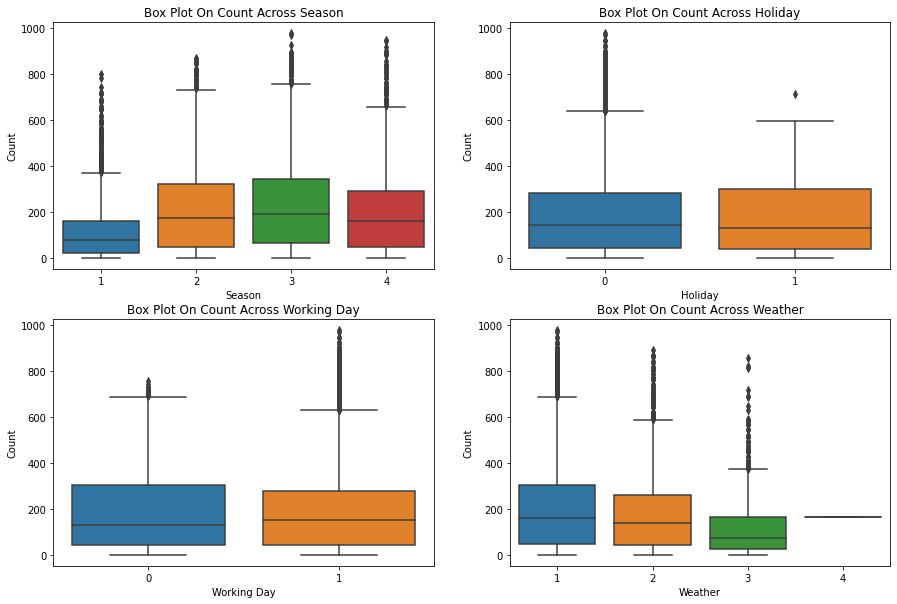

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)
sn.boxplot(data = train, y = "count", x = "season", orient = "v", ax = axes[0][0])
sn.boxplot(data = train, y = "count", x = "holiday", orient = "v", ax = axes[0][1])
sn.boxplot(data = train, y = "count", x = "workingday", orient = "v", ax = axes[1][0])
sn.boxplot(data = train, y = "count", x = "weather", orient = "v", ax = axes[1][1])


axes[0][0].set(xlabel = 'Season', ylabel = 'Count', title = "Box Plot On Count Across Season")
axes[0][1].set(xlabel = 'Holiday', ylabel = 'Count', title = "Box Plot On Count Across Holiday")
axes[1][0].set(xlabel = 'Working Day', ylabel = 'Count', title = "Box Plot On Count Across Working Day")
axes[1][1].set(xlabel = 'Weather', ylabel = 'Count', title = "Box Plot On Count Across Weather")

We can get some points from the graphs above:

*   Spring season has got relatively lower count
*   In 8, 17 and 18 hours is the time when people use more the bikes. It is related to the start of the work day and the final of the work day.
*   In working day people tend to use bikes more but it also presents the major quantity of outliers
*   There are months where people tend to use bikes.






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

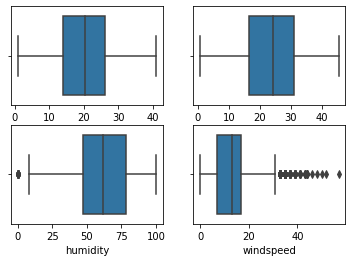

In [ ]:
cont_names=['temp','atemp','humidity','windspeed']

i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sn.boxplot(name,data=train) 
    
plt.show()

From above graphs we can see that windspeed has a lot of outliers. 

**Feature Engineering**

In [ ]:
from datetime import datetime

train['datetime'] = train['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

train['month'] = train['datetime'].apply(lambda x:x.month)
train['hour'] = train['datetime'].apply(lambda x:x.hour)
train['day'] = train['datetime'].apply(lambda x:x.day)
train['year'] = train['datetime'].apply(lambda x:x.year)




test['datetime'] = test['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

test['month'] = test['datetime'].apply(lambda x:x.month)
test['hour'] = test['datetime'].apply(lambda x:x.hour)
test['day'] = test['datetime'].apply(lambda x:x.day)
test['year'] = test['datetime'].apply(lambda x:x.year)

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
8771,2012-08-07 20:00:00,3,0,1,2,30.34,34.850,70,8.9981,74,374,448,8,20,7,2012
4723,2011-11-09 21:00:00,4,0,1,1,16.40,20.455,87,0.0000,9,152,161,11,21,9,2011
6348,2012-03-01 18:00:00,1,0,1,1,22.14,25.760,34,23.9994,27,498,525,3,18,1,2012
3566,2011-08-18 12:00:00,3,0,1,1,32.80,37.120,52,19.0012,34,139,173,8,12,18,2011
2458,2011-06-10 08:00:00,2,0,1,1,30.34,34.090,58,8.9981,29,423,452,6,8,10,2011


In [ ]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
season,1.000000,0.033066,-0.011192,0.006519,0.258834,0.265474,0.184691,-0.145857,0.094075,0.165215,0.163708,0.971622,-0.005828,0.009583,-0.003619
holiday,0.033066,1.000000,-0.252892,-0.007982,-0.002438,-0.007371,0.006894,-0.000802,0.040575,-0.021877,-0.006992,0.006182,-0.003956,-0.017716,0.017912
workingday,-0.011192,-0.252892,1.000000,0.035688,0.028918,0.024292,-0.011660,0.025964,-0.319455,0.121172,0.012494,-0.007349,0.003241,0.015406,-0.010165
weather,0.006519,-0.007982,0.035688,1.000000,-0.055186,-0.055984,0.400593,0.002128,-0.132222,-0.109973,-0.128244,0.007809,-0.023886,-0.008257,-0.009779
temp,0.258834,-0.002438,0.028918,-0.055186,1.000000,0.986309,-0.062392,-0.018852,0.465694,0.318709,0.394508,0.258081,0.147659,0.013151,0.065371
atemp,0.265474,-0.007371,0.024292,-0.055984,0.986309,1.000000,-0.041799,-0.058081,0.462165,0.316288,0.391513,0.265193,0.142808,0.010029,0.063458
humidity,0.184691,0.006894,-0.011660,0.400593,-0.062392,-0.041799,1.000000,-0.328973,-0.348185,-0.269019,-0.320566,0.199191,-0.281428,-0.002906,-0.074355
windspeed,-0.145857,-0.000802,0.025964,0.002128,-0.018852,-0.058081,-0.328973,1.000000,0.089267,0.093771,0.102849,-0.150881,0.151887,0.028787,-0.017301
casual,0.094075,0.040575,-0.319455,-0.132222,0.465694,0.462165,-0.348185,0.089267,1.000000,0.496474,0.690584,0.090606,0.299605,0.009901,0.149848
registered,0.165215,-0.021877,0.121172,-0.109973,0.318709,0.316288,-0.269019,0.093771,0.496474,1.000000,0.970677,0.170968,0.378934,0.017718,0.261990




*   temp y atemp seem to be similar. We can delete one of them
*   We also will delete casual and registered.
*   Working day and holiday as we see in the graphs tend to be similar so we can delete one.





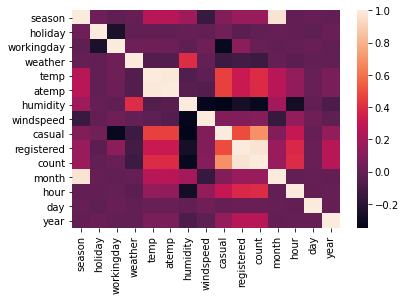

In [ ]:
train.cov()
sn.heatmap(train.corr())
plt.show()

As we see, the columns "season", "holiday", "workingday" and "weather" should be of "categorical" data type. But the current data type is "int" for those columns. We'll transform the dataset in the following ways so that we can get started up with our EDA.



*   Create new columns "date, "hour", "weekDay", "month" from "datetime" column. Because of this we'll delete the "datetime" column
*   Convert the datatype of "season","holiday","workingday" and "weather" to category.



In [ ]:
train=train.drop(['datetime','temp','casual','registered','day'], axis=1)
train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
8771,3,0,1,2,34.850,70,8.9981,448,8,20,2012
4723,4,0,1,1,20.455,87,0.0000,161,11,21,2011
6348,1,0,1,1,25.760,34,23.9994,525,3,18,2012
3566,3,0,1,1,37.120,52,19.0012,173,8,12,2011
2458,2,0,1,1,34.090,58,8.9981,452,6,8,2011


In [ ]:
test=test.drop(['datetime','temp','casual','registered','day'], axis=1)
test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
5329,4,0,1,1,22.725,82,8.9981,5,12,3,2011
733,1,0,0,1,20.455,35,19.9995,36,2,22,2011
10625,4,0,0,2,20.455,87,7.0015,48,12,3,2012
9275,3,0,0,1,31.060,41,19.0012,356,9,20,2012
8418,3,0,1,1,30.305,69,7.0015,10,7,3,2012


In [ ]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
atemp         float64
humidity        int64
windspeed     float64
count           int64
month           int64
hour            int64
year            int64
dtype: object

In [ ]:
categoricalFeatureNames = ["season","holiday","workingday","weather","month","year","hour"]
for var in categoricalFeatureNames:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [ ]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count            int64
month         category
hour          category
year          category
dtype: object

In [ ]:
#Our variable to predict is skewed so we apply the logarithm.
#The logarithm reduces the dynamic range of a variable so the differences 
# are preserved while the scale is not dramatically skewed.
train['count'] = np.log1p(train['count'])
train['count'].head(10)

8771     6.107023
4723     5.087596
6348     6.265301
3566     5.159055
2458     6.115892
10745    2.564949
2650     4.882802
5758     3.784190
7534     4.110874
8450     5.666427
Name: count, dtype: float64

In [ ]:
test['count'] = np.log1p(test['count'])
test['count'].head(10)

5329     1.791759
733      3.610918
10625    3.891820
9275     5.877736
8418     2.397895
7833     6.663133
7249     5.164786
1184     0.693147
4220     5.117994
7586     5.416100
Name: count, dtype: float64

In [ ]:
train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
8771,3,0,1,2,34.850,70,8.9981,6.107023,8,20,2012
4723,4,0,1,1,20.455,87,0.0000,5.087596,11,21,2011
6348,1,0,1,1,25.760,34,23.9994,6.265301,3,18,2012
3566,3,0,1,1,37.120,52,19.0012,5.159055,8,12,2011
2458,2,0,1,1,34.090,58,8.9981,6.115892,6,8,2011


In [ ]:
test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
5329,4,0,1,1,22.725,82,8.9981,1.791759,12,3,2011
733,1,0,0,1,20.455,35,19.9995,3.610918,2,22,2011
10625,4,0,0,2,20.455,87,7.0015,3.891820,12,3,2012
9275,3,0,0,1,31.060,41,19.0012,5.877736,9,20,2012
8418,3,0,1,1,30.305,69,7.0015,2.397895,7,3,2012


In [ ]:
y_train=train['count']
X_train=train.drop(["count"], axis=1)
y_test=test["count"]
X_test=test.drop(["count"], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(8708, 10)
(8708,)
(2178, 10)
(2178,)


In [ ]:
X_train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,month,hour,year
8771,3,0,1,2,34.850,70,8.9981,8,20,2012
4723,4,0,1,1,20.455,87,0.0000,11,21,2011
6348,1,0,1,1,25.760,34,23.9994,3,18,2012
3566,3,0,1,1,37.120,52,19.0012,8,12,2011
2458,2,0,1,1,34.090,58,8.9981,6,8,2011


In [ ]:
X_test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,month,hour,year
5329,4,0,1,1,22.725,82,8.9981,12,3,2011
733,1,0,0,1,20.455,35,19.9995,2,22,2011
10625,4,0,0,2,20.455,87,7.0015,12,3,2012
9275,3,0,0,1,31.060,41,19.0012,9,20,2012
8418,3,0,1,1,30.305,69,7.0015,7,3,2012


In [ ]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))

MSE train: 1.0249802786179898
RMSE train: 1.0124130968226308
MSE test: 1.0673904048411667
RMSE test: 1.0331458778125995


In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))

MSE train: 0.015850885782171
RMSE train: 0.12590030096139962
MSE test: 0.10634366945042834
RMSE test: 0.3261037709846796


In [ ]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'count', 'month', 'hour', 'year'],
      dtype='object')

In [ ]:
feature_list = ['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'month', 'hour', 'year']
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances if (pair[1] > 0.0)];

Variable: hour                 Importance: 0.76
Variable: atemp                Importance: 0.06
Variable: workingday           Importance: 0.05
Variable: month                Importance: 0.03
Variable: year                 Importance: 0.03
Variable: humidity             Importance: 0.02
Variable: season               Importance: 0.01
Variable: weather              Importance: 0.01
Variable: windspeed            Importance: 0.01


In [ ]:
new_train = train[['hour', 'workingday', 'atemp', 'month', 
                   'humidity', 'year', 'season', 'count']]

new_test = test[['hour', 'workingday', 'atemp', 'month', 
                   'humidity', 'year', 'season', 'count']]

In [ ]:
y_train=new_train['count']
X_train=new_train.drop(['count'], axis=1)
y_test=new_test['count']
X_test=new_test.drop(['count'], axis=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 7)
(2178, 7)
(8708,)
(2178,)


In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))

MSE train: 0.019870954838607884
RMSE train: 0.14096437435965117
MSE test: 0.11867617578397907
RMSE test: 0.34449408671845017


In [ ]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [50, 60, 70],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [10, 12],
    'n_estimators': [400, 500, 600]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
y_train=train['count']
X_train=train.drop(["count"], axis=1)
y_test=test["count"]
X_test=test.drop(["count"], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(8708, 10)
(8708,)
(2178, 10)
(2178,)


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 32.5min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
rfc = RandomForestRegressor(n_estimators = 500, bootstrap = True, max_depth = 60, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 10)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))

MSE train: 0.0464229364251216
RMSE train: 0.21545982554787702
MSE test: 0.10517973212865306
RMSE test: 0.32431424903733885


In [ ]:
y_test
op=pd.DataFrame({'count':np.exp(y_test)})
op

,count
1195,76.0
9162,5.0
8807,699.0
8613,186.0
3254,217.0
...,...
2338,99.0
4815,232.0
526,18.0
9394,580.0


In [ ]:
y_pred_test
op=pd.DataFrame({'count':np.exp(y_pred_test)})
op

,count
0,91.538902
1,7.240983
2,659.471830
3,168.830583
4,193.636013
...,...
2173,108.983468
2174,258.897248
2175,19.177677
2176,589.570730
